# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Build query URL and test it
# api.openweathermap.org/data/2.5/weather?q=London&appid={API key}
url = 'https://api.openweathermap.org/data/2.5/weather?'
city_query_url = f'{url}q={city}&appid={weather_api_key}&units=imperial'
response = requests.get(city_query_url).json()
print(response)

{'coord': {'lon': -68.5145, 'lat': 63.7506}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 41.7, 'feels_like': 36.66, 'temp_min': 41.7, 'temp_max': 42.53, 'pressure': 992, 'humidity': 86}, 'visibility': 10000, 'wind': {'speed': 8.01, 'deg': 150}, 'rain': {'1h': 0.3}, 'clouds': {'all': 90}, 'dt': 1628105489, 'sys': {'type': 2, 'id': 47658, 'country': 'CA', 'sunrise': 1628063704, 'sunset': 1628126709}, 'timezone': -14400, 'id': 5983720, 'name': 'Iqaluit', 'cod': 200}


In [5]:
# Create lists to store data
cityName = []
cityLat = []
cityLng = []
maxTemp = []
humidity = []
cloudiness = []
windSpeed = []
country = []
date = []

#create progress counter
counter = 0

#reset url
city_query_url = f'{url}q={city}&appid={weather_api_key}'

In [6]:
# Run loop
for idx,city in enumerate(cities):
    if idx%100==0:
        time.sleep(65)
    try:
        city_query_url = f'{url}q={city}&appid={weather_api_key}'
        response = requests.get(city_query_url).json()
        cityName.append(response['name'])
        cityLat.append(response['coord']['lat'])
        cityLng.append(response['coord']['lon'])
        maxTemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windSpeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['sys']['sunrise'])
        counter += 1
        print(f'Processing Record {counter} of Set 1 | {city}')
    except KeyError:
        print('Missing data, move on to next')
    

Processing Record 1 of Set 1 | nikolskoye
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | sao joao da barra
Processing Record 5 of Set 1 | meulaboh
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | gigmoto
Processing Record 8 of Set 1 | kodiak
Processing Record 9 of Set 1 | woodward
Missing data, move on to next
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | calabozo
Processing Record 12 of Set 1 | hyderabad
Processing Record 13 of Set 1 | saint-philippe
Processing Record 14 of Set 1 | kavieng
Processing Record 15 of Set 1 | saskylakh
Processing Record 16 of Set 1 | ler
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | castro
Missing data, move on to next
Processing Record 20 of Set 1 | garowe
Processing Record 21 of Set 1 | deer lake
Processing Record 22 of Set 1 | saint-augustin
Processing Record 23 of Set 1 | 

Processing Record 189 of Set 1 | san cristobal
Missing data, move on to next
Processing Record 190 of Set 1 | guthrie
Processing Record 191 of Set 1 | pontal do parana
Processing Record 192 of Set 1 | chiang klang
Missing data, move on to next
Processing Record 193 of Set 1 | labuhan
Processing Record 194 of Set 1 | ixtapa
Processing Record 195 of Set 1 | mizdah
Processing Record 196 of Set 1 | tuatapere
Processing Record 197 of Set 1 | nanortalik
Processing Record 198 of Set 1 | caravelas
Processing Record 199 of Set 1 | otavi
Processing Record 200 of Set 1 | poum
Processing Record 201 of Set 1 | mogwase
Missing data, move on to next
Processing Record 202 of Set 1 | rawah
Processing Record 203 of Set 1 | mar del plata
Processing Record 204 of Set 1 | cap-aux-meules
Processing Record 205 of Set 1 | baykit
Missing data, move on to next
Missing data, move on to next
Processing Record 206 of Set 1 | mahebourg
Processing Record 207 of Set 1 | angoche
Processing Record 208 of Set 1 | emirda

Processing Record 367 of Set 1 | catuday
Processing Record 368 of Set 1 | naron
Processing Record 369 of Set 1 | kilrush
Processing Record 370 of Set 1 | corinto
Processing Record 371 of Set 1 | niimi
Processing Record 372 of Set 1 | palamos
Processing Record 373 of Set 1 | padang
Processing Record 374 of Set 1 | touros
Processing Record 375 of Set 1 | konevo
Processing Record 376 of Set 1 | libreville
Processing Record 377 of Set 1 | coihaique
Processing Record 378 of Set 1 | muros
Processing Record 379 of Set 1 | newport
Processing Record 380 of Set 1 | general roca
Processing Record 381 of Set 1 | sergeyevka
Processing Record 382 of Set 1 | eskisehir
Processing Record 383 of Set 1 | kidodi
Processing Record 384 of Set 1 | hisai
Processing Record 385 of Set 1 | qinzhou
Processing Record 386 of Set 1 | zhezkazgan
Missing data, move on to next
Processing Record 387 of Set 1 | paamiut
Processing Record 388 of Set 1 | hami
Processing Record 389 of Set 1 | kuybyshevo
Processing Record 390

Processing Record 551 of Set 1 | sabang
Processing Record 552 of Set 1 | pishin


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# create dictionary out of the data
weather_dict = {
    'City': cityName,
    'Lat': cityLat,
    'Lng': cityLng,
    'Max Temp': maxTemp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': windSpeed,
    'Country': country,
    'Date': date
}

In [8]:
# create a Dataframe
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nikolskoye,59.7035,30.7861,287.09,71,67,1.07,RU,1628041600
1,Mataura,-46.1927,168.8643,275.08,91,100,1.34,NZ,1628107190
2,Puerto Ayora,-0.7393,-90.3518,301.13,75,17,3.13,EC,1628078693
3,São João da Barra,-21.6403,-41.0511,297.20,65,7,6.77,BR,1628068478
4,Meulaboh,4.1363,96.1285,297.63,87,100,1.77,ID,1628119976


In [9]:
# export to .csv
weather_data.to_csv('weather_data.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#  Get the indices of cities that have humidity over 100%.
high_humidity = weather_data.loc[weather_data["Humidity"] >= 100]
print(high_humidity)
# No cities have greater humidity than 100, step is irrelevant, but doing it anyway in case I rerun the earlier steps and get a different outcome

          City      Lat       Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
145      Alofi -19.0595 -169.9187    291.09       100         100        1.03   
406  Vestmanna  62.1564   -7.1664    284.66       100          90        4.63   
492      Dubbo -32.2500  148.6167    279.22       100          90        3.09   

    Country        Date  
145      NU  1628099181  
406      FO  1628049726  
492      AU  1628110316  


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_data.loc[weather_data["Humidity"] <= 100]
print(clean_city_data)

                  City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0           Nikolskoye  59.7035   30.7861    287.09        71          67   
1              Mataura -46.1927  168.8643    275.08        91         100   
2         Puerto Ayora  -0.7393  -90.3518    301.13        75          17   
3    São João da Barra -21.6403  -41.0511    297.20        65           7   
4             Meulaboh   4.1363   96.1285    297.63        87         100   
..                 ...      ...       ...       ...       ...         ...   
547            Malakal   9.5334   31.6605    296.26        92          47   
548            Bubaque  11.2833  -15.8333    299.99        80          95   
549          Ust-Kuyga  70.0167  135.6000    282.43        51           0   
550             Sabang   5.8933   95.3214    301.44        76         100   
551             Pishin  30.5803   66.9961    300.11        24          32   

     Wind Speed Country        Date  
0          1.07      RU  1628041600  

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

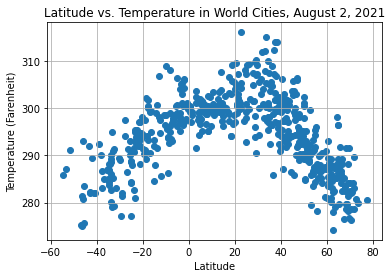

In [12]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")
plt.title("Latitude vs. Temperature in World Cities, August 2, 2021")
plt.ylabel("Temperature (Farenheit)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("TemperaturevsLatitude.png")
plt.show()

## Latitude vs. Humidity Plot

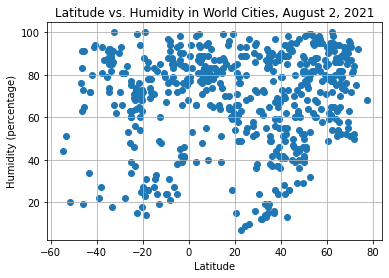

In [13]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")
plt.title("Latitude vs. Humidity in World Cities, August 2, 2021")
plt.ylabel("Humidity (percentage)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("HumidityvsLatitude.png")
plt.show()

## Latitude vs. Cloudiness Plot

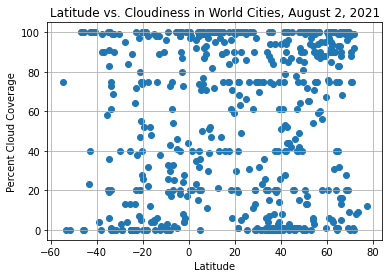

In [14]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")
plt.title("Latitude vs. Cloudiness in World Cities, August 2, 2021")
plt.ylabel("Percent Cloud Coverage")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("HumidityvsCloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

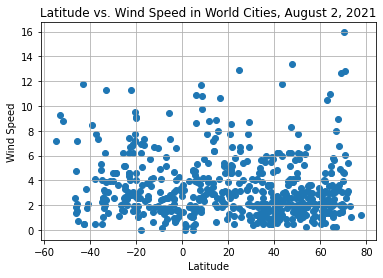

In [15]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")
plt.title("Latitude vs. Wind Speed in World Cities, August 2, 2021")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("HumidityvsWindSpeed.png")
plt.show()

## Linear Regression

In [16]:
# Create Northern Hemisphere dataframe
n_hemisphere_df = weather_data.loc[weather_data["Lat"] > 0]
print(n_hemisphere_df)

                  City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0           Nikolskoye  59.7035   30.7861    287.09        71          67   
4             Meulaboh   4.1363   96.1285    297.63        87         100   
6              Gigmoto  13.7796  124.3900    301.07        82          97   
7    Saint Paul Harbor  57.7900 -152.4072    286.88        77          20   
8             Woodward  36.4337  -99.3904    304.78        37           1   
..                 ...      ...       ...       ...       ...         ...   
547            Malakal   9.5334   31.6605    296.26        92          47   
548            Bubaque  11.2833  -15.8333    299.99        80          95   
549          Ust-Kuyga  70.0167  135.6000    282.43        51           0   
550             Sabang   5.8933   95.3214    301.44        76         100   
551             Pishin  30.5803   66.9961    300.11        24          32   

     Wind Speed Country        Date  
0          1.07      RU  1628041600  

In [17]:
# Create Southern Hemisphere dataframe
s_hemisphere_df = weather_data.loc[weather_data["Lat"] < 0]
print(s_hemisphere_df)

                    City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
1                Mataura -46.1927  168.8643    275.08        91         100   
2           Puerto Ayora  -0.7393  -90.3518    301.13        75          17   
3      São João da Barra -21.6403  -41.0511    297.20        65           7   
5              Cape Town -33.9258   18.4232    288.64        88          20   
9                 Avarua -21.2078 -159.7750    297.18        60          47   
..                   ...      ...       ...       ...       ...         ...   
536        Mount Gambier -37.8333  140.7667    283.10        93          90   
538             Kanigoro  -8.1300  112.2190    294.90        96          43   
539             Cabedelo  -6.9811  -34.8339    297.52        79          33   
545       Port Macquarie -31.4333  152.9167    283.13        62           0   
546  Santiago del Estero -27.7951  -64.2615    297.62        22          13   

     Wind Speed Country        Date  
1          1.

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.4771324727226287


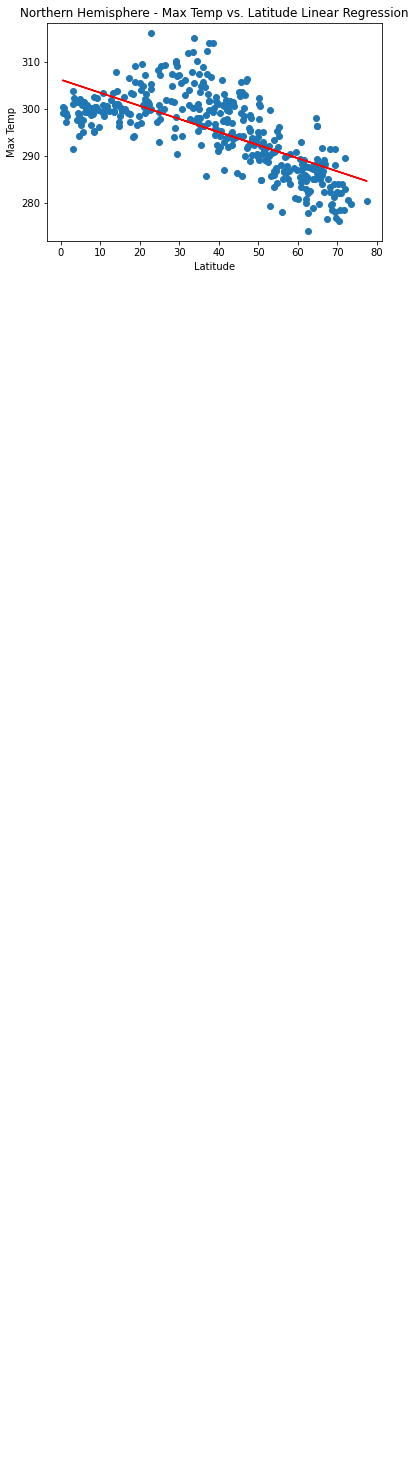

<Figure size 432x288 with 0 Axes>

In [18]:
# Scatterplot
x_values = n_hemisphere_df['Lat']
y_values = n_hemisphere_df['Max Temp']

# Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

#print r value
print(f"The r-value is: {rvalue**2}")

plt.show()
plt.savefig("NHTempRegress.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5650502864019522


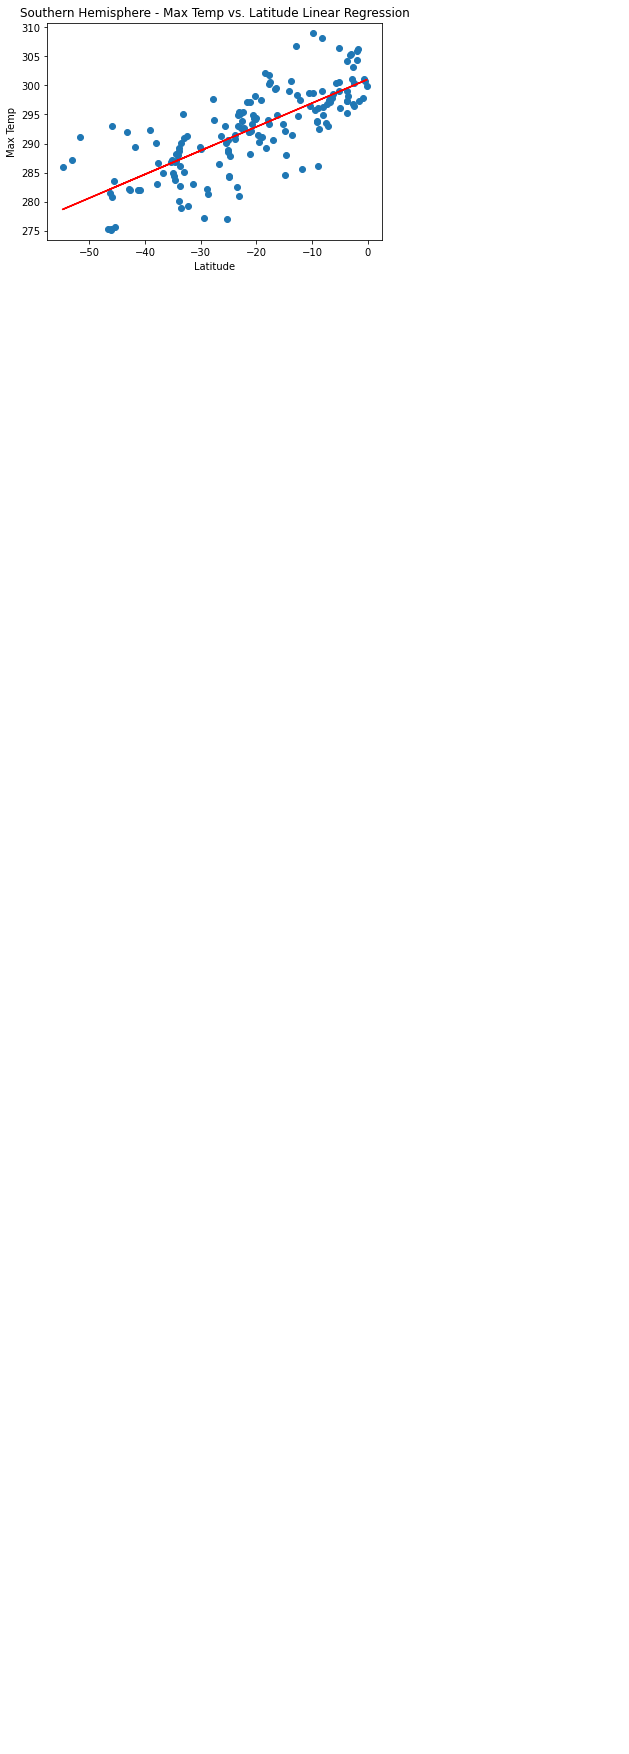

<Figure size 432x288 with 0 Axes>

In [19]:
# Scatterplot
x_values = s_hemisphere_df['Lat']
y_values = s_hemisphere_df['Max Temp']

# Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

#print r value
print(f"The r-value is: {rvalue**2}")

plt.show()
plt.savefig("SHTempRegress.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0002994483176083637


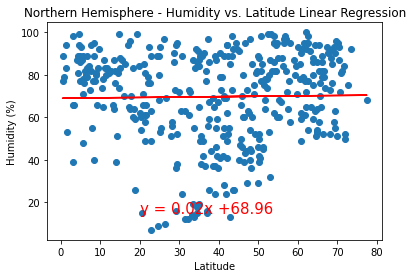

<Figure size 432x288 with 0 Axes>

In [20]:
# Scatterplot
x_values = n_hemisphere_df['Lat']
y_values = n_hemisphere_df['Humidity']

# Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

#print r value
print(f"The r-value is: {rvalue**2}")

plt.show()
plt.savefig("NHHumidRegress.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0014208622732024621


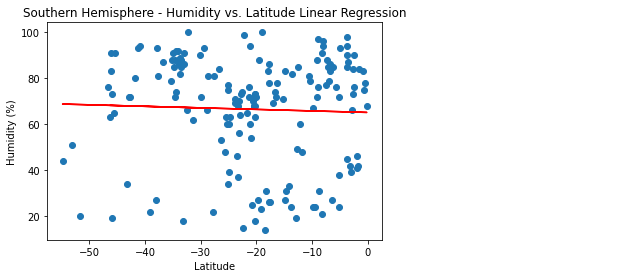

<Figure size 432x288 with 0 Axes>

In [21]:
# Scatterplot
x_values = s_hemisphere_df['Lat']
y_values = s_hemisphere_df['Humidity']

# Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

#print r value
print(f"The r-value is: {rvalue**2}")

plt.show()
plt.savefig("SHHumidRegress.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.002588329026492726


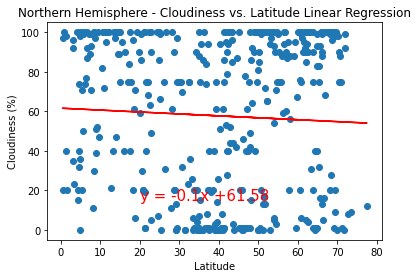

<Figure size 432x288 with 0 Axes>

In [22]:
x_values = n_hemisphere_df['Lat']
y_values = n_hemisphere_df['Cloudiness']

# Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

#print r value
print(f"The r-value is: {rvalue**2}")

plt.show()
plt.savefig("NHCloudRegress.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.005605192741827427


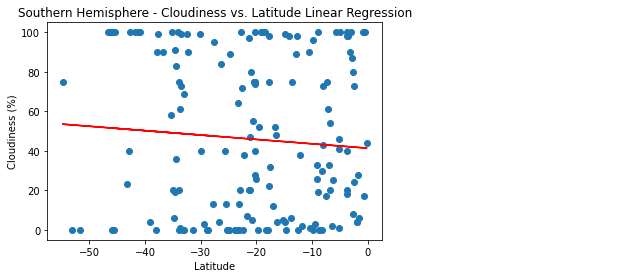

<Figure size 432x288 with 0 Axes>

In [23]:
x_values = s_hemisphere_df['Lat']
y_values = s_hemisphere_df['Cloudiness']

# Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

#print r value
print(f"The r-value is: {rvalue**2}")

plt.show()
plt.savefig("SHCloudRegress.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.003786352299046552


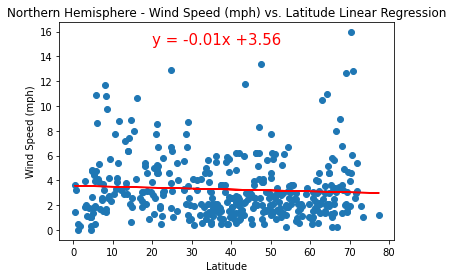

<Figure size 432x288 with 0 Axes>

In [24]:
x_values = n_hemisphere_df['Lat']
y_values = n_hemisphere_df['Wind Speed']

# Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

#print r value
print(f"The r-value is: {rvalue**2}")

plt.show()
plt.savefig("NHWindRegress.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.033275894267335786


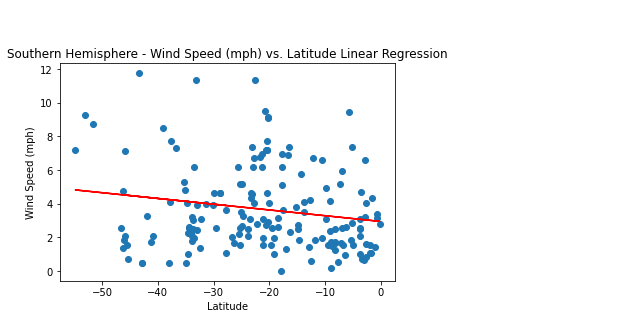

<Figure size 432x288 with 0 Axes>

In [25]:
x_values = s_hemisphere_df['Lat']
y_values = s_hemisphere_df['Wind Speed']

# Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

#print r value
print(f"The r-value is: {rvalue**2}")

plt.show()
plt.savefig("SHWindRegress.png")